In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib.pyplot import imshow
import matplotlib.cm as cm
import matplotlib.pylab as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import PIL
from PIL import ImageFilter
import cv2
import itertools
import random
import keras
import imutils
from imutils import paths
import os
from keras import optimizers
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose
from keras import backend as K

%matplotlib inline

In [ ]:
def pil_image(img_path):
    pil_im =PIL.Image.open(img_path).convert('L')
    pil_im=pil_im.resize((105,105))
    #imshow(np.asarray(pil_im))
    return pil_im

# Augumentation Steps 
1) Noise
2) Blur
3) Perpective Rotation
4) Shading
5) Variable Character Spacing
6) Variable Aspect Ratio

In [ ]:
def noise_image(pil_im):
    img_array = np.asarray(pil_im)
    mean = 0.0   
    std = 5  
    noisy_img = img_array + np.random.normal(mean, std, img_array.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)
    noise_img = PIL.Image.fromarray(np.uint8(noisy_img_clipped)) 
    noise_img=noise_img.resize((105,105))
    return noise_img

In [ ]:
def blur_image(pil_im):
    blur_img = pil_im.filter(ImageFilter.GaussianBlur(radius=3)) 
    blur_img=blur_img.resize((105,105))
    return blur_img

In [ ]:
def affine_rotation(img):
    
    rows, columns = img.shape

    point1 = np.float32([[10, 10], [30, 10], [10, 30]])
    point2 = np.float32([[20, 15], [40, 10], [20, 40]])

    A = cv2.getAffineTransform(point1, point2)

    output = cv2.warpAffine(img, A, (columns, rows))
    affine_img = PIL.Image.fromarray(np.uint8(output))
    
    affine_img=affine_img.resize((105,105))
    return affine_img
   

In [ ]:
def gradient_fill(image):
    laplacian = cv2.Laplacian(image,cv2.CV_64F)
    laplacian = cv2.resize(laplacian, (105, 105))
    return laplacian

## Preparing Dataset

In [ ]:
data_path = "drive/MyDrive/Font/fonts/"
data=[]
labels=[]
imagePaths = sorted(list(paths.list_images(data_path)))
random.seed(42)
random.shuffle(imagePaths)

In [ ]:
def conv_label(label):
    if label == 'Lato':
        return 0
    elif label == 'Raleway':
        return 1
    elif label == 'Roboto':
        return 2
    elif label == 'Sansation':
        return 3
    elif label == 'Walkway':
        return 4

In [ ]:
augument=["blur","noise","affine","gradient"]
a=itertools.combinations(augument, 4)

for i in list(a): 
    print(list(i))

['blur', 'noise', 'affine', 'gradient']


In [ ]:
counter=0
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    label = conv_label(label)
    pil_img = pil_image(imagePath)
    
    org_img = img_to_array(pil_img)

    data.append(org_img)
    labels.append(label)
    
    augument=["noise","blur","affine","gradient"]
    for l in range(0,len(augument)):
    
        a=itertools.combinations(augument, l+1)

        for i in list(a): 
            combinations=list(i)
            print(len(combinations))
            temp_img = pil_img
            for j in combinations:
            
                if j == 'noise':
                    
                    temp_img = noise_image(temp_img)
                    
                elif j == 'blur':
                    
                    temp_img = blur_image(temp_img)
                    
                    
    
                elif j == 'affine':
                    open_cv_affine = np.array(pil_img)
                    
                    temp_img = affine_rotation(open_cv_affine)

                elif j == 'gradient':
                    open_cv_gradient = np.array(pil_img)
                    
                    temp_img = gradient_fill(open_cv_gradient)
  
            temp_img = img_to_array(temp_img)
            data.append(temp_img)
            labels.append(label)

Streaming output truncated to the last 5000 lines.
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2
2
2
2
2
2
3
3
3
3
4
1
1
1
1
2

In [ ]:
data = np.asarray(data, dtype="float") / 255.0
labels = np.array(labels)
print("Success")
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

Success


In [ ]:

trainY = to_categorical(trainY, num_classes=5)
testY = to_categorical(testY, num_classes=5)

In [ ]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)

In [ ]:
K.set_image_data_format('channels_last')

In [ ]:
 def create_model():
  model=keras.Sequential()

  
  model.add(Conv2D(64, kernel_size=(48, 48), activation='relu', input_shape=(105,105,1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, kernel_size=(24, 24), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2DTranspose(128, (24,24), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
  model.add(UpSampling2D(size=(2, 2)))

  model.add(Conv2DTranspose(64, (12,12), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
  model.add(UpSampling2D(size=(2, 2)))

  
  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

  model.add(Flatten())

  model.add(Dense(4096, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(4096,activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(2383,activation='relu'))

  model.add(Dense(5, activation='softmax'))
 
  return model

In [ ]:
from tensorflow.keras import optimizers
batch_size = 25
epochs = 50
model= create_model()
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min')

filepath="drive/MyDrive/Font/model/top_model.h5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [early_stopping,checkpoint]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 64)        147520    
                                                                 
 batch_normalization (BatchN  (None, 58, 58, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 128)         4718720   
                                                                 
 batch_normalization_1 (Batc  (None, 6, 6, 128)        512       
 hNormalization)                                                 
                                                        

In [ ]:
history = model.fit(trainX, trainY,shuffle=True,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, testY),callbacks=callbacks_list)

Epoch 1/50
240/240 [==============================] - ETA: 0s - loss: 0.1599 - accuracy: 0.2348
Epoch 00001: val_loss improved from inf to 0.15785, saving model to drive/MyDrive/Font/model/top_model.h5
240/240 [==============================] - 175s 625ms/step - loss: 0.1599 - accuracy: 0.2348 - val_loss: 0.1578 - val_accuracy: 0.2590
Epoch 2/50
240/240 [==============================] - ETA: 0s - loss: 0.1478 - accuracy: 0.3400
Epoch 00002: val_loss did not improve from 0.15785
240/240 [==============================] - 124s 518ms/step - loss: 0.1478 - accuracy: 0.3400 - val_loss: 0.1769 - val_accuracy: 0.2250
Epoch 3/50
240/240 [==============================] - ETA: 0s - loss: 0.1278 - accuracy: 0.4533
Epoch 00003: val_loss improved from 0.15785 to 0.15022, saving model to drive/MyDrive/Font/model/top_model.h5
240/240 [==============================] - 167s 695ms/step - loss: 0.1278 - accuracy: 0.4533 - val_loss: 0.1502 - val_accuracy: 0.3595
Epoch 4/50
240/240 [====================

In [ ]:
from keras.models import load_model
model = load_model('drive/MyDrive/Font/model/top_model.h5')

In [ ]:
img_path="drive/MyDrive/Font/sample/sample.jpg"
pil_im =PIL.Image.open(img_path).convert('L')
pil_im=blur_image(pil_im)
org_img = img_to_array(pil_im)

In [ ]:
def rev_conv_label(label):
    if label == 0 :
        return 'Lato'
    elif label == 1:
        return 'Raleway'
    elif label == 2 :
        return 'Roboto'
    elif label == 3 :
        return 'Sansation'
    elif label == 4:
        return 'Walkway'

In [ ]:
data=[]
data.append(org_img)
data = np.asarray(data, dtype="float") / 255.0

In [ ]:
predict_y = model.predict(data) 
y=np.argmax(predict_y,axis=1)


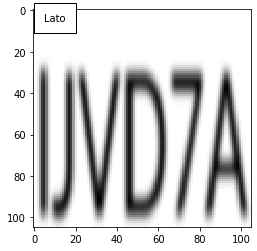

In [ ]:
label = rev_conv_label(int(y[0]))
fig, ax = plt.subplots(1)
ax.imshow(pil_im, interpolation='nearest', cmap=cm.gray)
ax.text(5, 5, label , bbox={'facecolor': 'white', 'pad': 10})
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


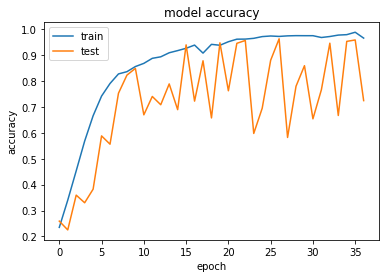

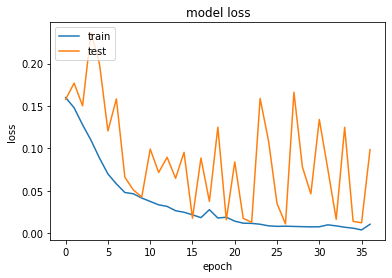

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pred = model.predict(testX)
pred = np.argmax(pred, axis=1)
y_test = np.argmax(testY, axis=1)
target_names = ['Lato', 'Raleway', 'Roboto', 'Sansation', 'Walkway']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

        Lato       0.97      0.94      0.96       388
     Raleway       0.93      0.99      0.96       390
      Roboto       0.94      1.00      0.97       406
   Sansation       0.99      0.92      0.95       393
     Walkway       1.00      0.96      0.98       423

    accuracy                           0.96      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.96      0.96      2000



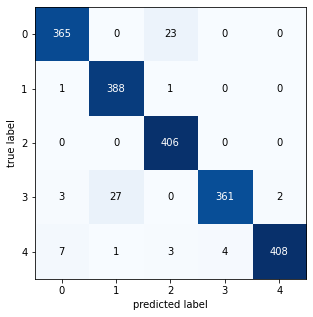

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_target=y_test, 
                  y_predicted=pred, 
                  binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5))